In [2]:
#import libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get stock quote
df=web.DataReader('WIT',data_source='yahoo',start='2019-01-01',end='2022-06-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,5.16,5.10,5.15,5.13,316600.0,5.036029
2019-01-02,5.16,5.07,5.07,5.11,466800.0,5.016395
2019-01-03,5.09,5.02,5.07,5.05,676500.0,4.957494
2019-01-04,5.08,5.02,5.05,5.06,1356100.0,4.967311
2019-01-07,5.11,5.04,5.07,5.06,659700.0,4.967311
...,...,...,...,...,...,...
2022-06-13,5.63,5.55,5.58,5.55,3908000.0,5.550000
2022-06-14,5.67,5.58,5.58,5.65,2411200.0,5.650000
2022-06-15,5.68,5.55,5.61,5.62,4395400.0,5.620000


In [4]:
df.shape

(874, 6)

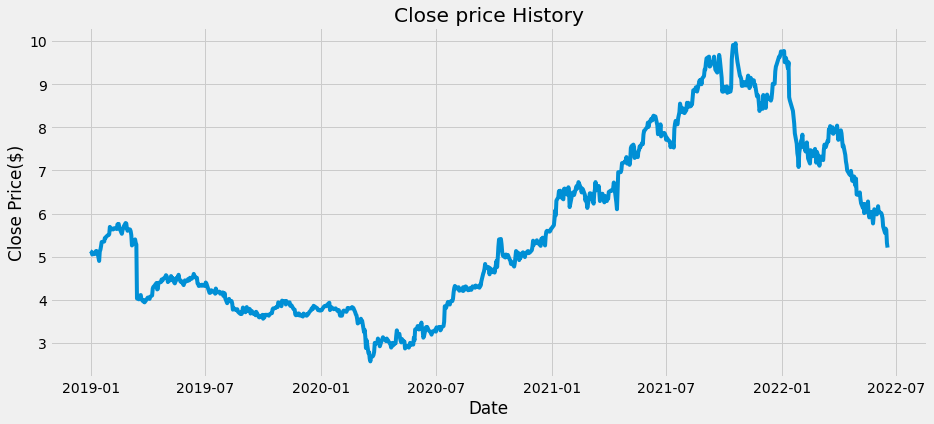

In [61]:
#visualize closing price history
plt.figure(figsize=(14,6))
plt.title("Close price History")
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price($)')
plt.show()

In [8]:
# create a new dataframe with only close column
df1=df.filter(['Close'])
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.3468835 ],
       [0.34417347],
       [0.3360434 ],
       [0.33739838],
       [0.33739838],
       [0.34417347],
       [0.3468835 ],
       [0.34146345],
       [0.34552845],
       [0.31571818],
       [0.34552845],
       [0.3509485 ],
       [0.3617886 ],
       [0.37533879],
       [0.37669377],
       [0.38753387],
       [0.38753387],
       [0.39159894],
       [0.39701899],
       [0.39701899],
       [0.39972901],
       [0.42276425],
       [0.41463418],
       [0.4173442 ],
       [0.41463418],
       [0.4173442 ],
       [0.41869918],
       [0.41869918],
       [0.41598916],
       [0.43089433],
       [0.42953928],
       [0.43224937],
       [0.42005423],
       [0.40108406],
       [0.41192415],
       [0.4173442 ],
       [0.42411923],
       [0.43495939],
       [0.43360435],
       [0.41869918],
       [0.41056911],
       [0.41598916],
       [0.41463418],
       [0.40921413],
       [0.39701899],
       [0.36449869],
       [0.36720872],
       [0.380

In [9]:
# train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(611, 263)

In [11]:
len(train_data)

611

In [12]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for i in range (90,len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
for i in range (90,len(test_data)):
    x_test.append(test_data[i-90:i,0])
    y_test.append(test_data[i,0])

In [13]:
#convert  into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_test,y_test=np.array(x_test),np.array(y_test)

In [14]:
x_train.shape,y_train.shape

((521, 90), (521,))

In [15]:
x_test.shape,y_test.shape

((173, 90), (173,))

In [17]:
#reshape the data[samples,time steps,features] required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [18]:
#build Lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [19]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
# Train the model
model.fit(x_train,y_train,batch_size= 60,epochs=100)

Epoch 1/100
9/9 [==============================] - 8s 268ms/step - loss: 0.0413
Epoch 2/100
9/9 [==============================] - 3s 307ms/step - loss: 0.0098
Epoch 3/100
9/9 [==============================] - 3s 319ms/step - loss: 0.0044
Epoch 4/100
9/9 [==============================] - 3s 285ms/step - loss: 0.0029
Epoch 5/100
9/9 [==============================] - 3s 318ms/step - loss: 0.0019
Epoch 6/100
9/9 [==============================] - 3s 306ms/step - loss: 0.0017
Epoch 7/100
9/9 [==============================] - 3s 286ms/step - loss: 0.0014
Epoch 8/100
9/9 [==============================] - 3s 316ms/step - loss: 0.0013
Epoch 9/100
9/9 [==============================] - 2s 271ms/step - loss: 0.0013
Epoch 10/100
9/9 [==============================] - 3s 292ms/step - loss: 0.0013
Epoch 11/100
9/9 [==============================] - 3s 283ms/step - loss: 0.0012
Epoch 12/100
9/9 [==============================] - 3s 299ms/step - loss: 0.0012
Epoch 13/100
9/9 [===================

In [21]:
#prediction
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [22]:
#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
#rmse
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4.330047049706104

In [24]:
math.sqrt(mean_squared_error(y_test,test_predict))

7.199614436175191

In [45]:
len(train_predict),len(test_predict)

(521, 173)

In [ ]:
import numpy as np

No handles with labels found to put in legend.


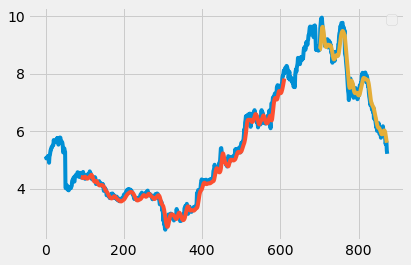

In [52]:
#plot the data
#shift train predictions for plotting
look_back=90
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test pred for plotting

testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)-1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.legend()
plt.show()

In [59]:
wipro_quote=web.DataReader('WIT',data_source='yahoo',start='2019-01-01',end='2022-06-21')
#create a new Dataframe
new_df=wipro_quote.filter(['Close'])
#get the last 90 days closing values and convert df to an array
last_90_days=new_df[-90:].values
#scale the data
last_90_days_scaled=scaler.transform(last_90_days)
#create empty list
X_test=[]
#append the past 90 days
X_test.append(last_90_days_scaled)
#convert the x_test to numpy array
X_test=np.array(X_test)
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[5.4091926]]


In [60]:
wipro_quote2=web.DataReader('WIT',data_source='yahoo',start='2022-06-22',end='2022-06-22')
print(wipro_quote2['Close'])

Date
2022-06-21    5.49
2022-06-22    5.33
Name: Close, dtype: float64
